# Nobeyama Radioheliograph Data

Handles Stokes IV data for a given date

Data manual: https://solar.nro.nao.ac.jp/norh/doc/man_v33e.pdf

List data for any year and month (here it is August 2017):
```batch
curl --list-only ftp://solar-pub.nao.ac.jp/pub/nsro/norh/images/daily/2017/08/
```

Download FITS image:
```batch
curl ftp://solar-pub.nao.ac.jp/pub/nsro/norh/images/daily/2017/08/ifa170821_024433 --output data/NORH/ifa170821_024433
```

Daily image naming conventions:

`i[f/p][a/s/z]YYMMDD_HHMMSS`

* `f`: full sun
* `p`: partial sun
* `a`: 17GHz - L + R (2x Stokes I)
* `s`: 17GHz - L - R (2x Stokes V)
* `z`: 34GHz - L + R (2x Stokes I)

In [1]:
!curl --list-only ftp://solar-pub.nao.ac.jp/pub/nsro/norh/images/daily/

1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100   174    0   174    0     0     98      0 --:--:--  0:00:01 --:--:--    98


Filename: ./data/NORH/ifa170821_024433
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      64   (512, 512)   float32   


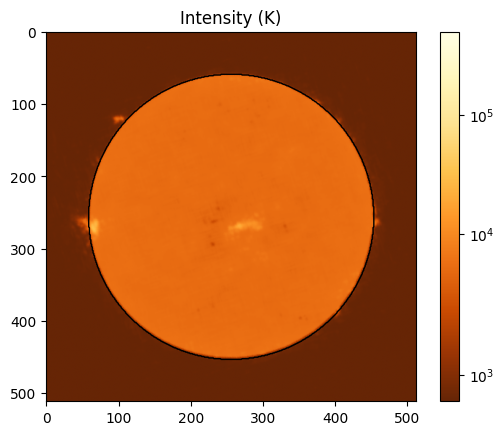

Filename: ./data/NORH/ifs170821_024433
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      64   (512, 512)   float32   


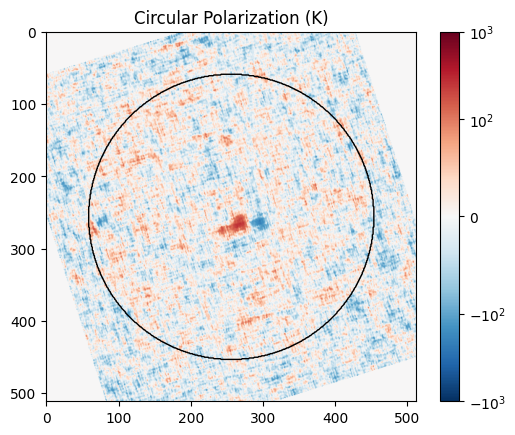

In [2]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm, SymLogNorm

hdul = fits.open("./data/NORH/ifa170821_024433")
hdul.info()

header = hdul[0].header
data_a = hdul[0].data

radius = (450 - 50 - 5)/2
w, h = data_a.shape
xx, yy = np.ogrid[:h, :w]
mask_ondisk = (xx - w/2)**2 + (yy - h/2)**2 <= radius**2

plt.imshow(data_a/2, cmap='YlOrBr_r', norm=SymLogNorm(5000, vmin=5, vmax=5e5))
plt.colorbar()
plt.contour(mask_ondisk, linewidths=1, colors="black")
plt.title('Intensity (K)')
plt.show()

hdul.close()

hdul = fits.open("./data/NORH/ifs170821_024433")
hdul.info()

header = hdul[0].header
data_s = hdul[0].data

plt.imshow(data_s/2, cmap='RdBu_r', norm=SymLogNorm(100, vmin=-1e3, vmax=1e3))
plt.title('Circular Polarization (K)')
plt.colorbar()
plt.contour(mask_ondisk, linewidths=1, colors="black")
plt.show()

hdul.close()

# Expanded Owens Valley Solar Array Data

From https://ovsa.njit.edu/browser/index.html?suntoday_date=2024-04-08

Filename: ./data/EOVSA/eovsa_20240408.spw00-01.tb.disk.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU     88   (1024, 1024)   float32   
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
BMAJ    =      0.0120185830858                                                  
BMIN    =     0.00732200410631                                                  
BPA     =   -280.4886156311035                                                  
BTYPE   = 'Brightness Temperature'                                              
OBJECT  = 'Sun     '   

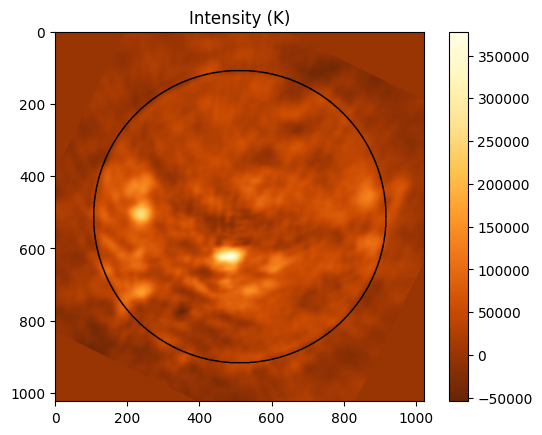

In [3]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm, SymLogNorm

hdul = fits.open("./data/EOVSA/eovsa_20240408.spw00-01.tb.disk.fits") #1.418 GHz
hdul.info()

header = hdul[1].header
print(header.tostring(sep='\n'))
data_a = hdul[1].data

radius = (405)
w, h = data_a.shape
xx, yy = np.ogrid[:h, :w]
mask_ondisk = (xx - w/2)**2 + (yy - h/2)**2 <= radius**2

plt.imshow(data_a/2, cmap='YlOrBr_r')
plt.colorbar()
plt.contour(mask_ondisk, linewidths=1, colors="black")
plt.title('Intensity (K)')
plt.show()

hdul.close()